# Anguli Forensics
---

## Trying to investigate the reason for the high minutiae count in impressions

### Extracting Minutiae Points from Image
* Initally Added info to the database
* Ran Minuiea_extractor_main.py
``` Py
    {
        'Path':str(),
        'mv': list()
    }
```

In [ ]:
#%% Minutiae Extraction Code

from minutiae_extractor import extract_minutiae_vector as emv
## Usage emv(path_to_image)


In [3]:
%pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 14.4 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 59.7 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
#%% DB Connection

from BI import Datasets

ds_name='Anguli_test'
ds_name='Anguli_200k_1M'
ds = Datasets()

db=ds.connect(ds_name)



In [2]:
## Imports
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 as cv
from bson.regex import Regex
import numpy as np

ds.ds_prefix = Path("Y:/")

In [9]:
imd=db.find_one({'path':Regex('Fingerprint')},{"mv":0,"_id":0})

In [10]:
imd

{'path': 'Anguli_200k_1M/Fingerprints/fp_1/1.tiff'}

In [37]:
def plot(imp):
    "Plot the image from the path"
    plt.imshow(cv.imread(ds.ds_prefix/imp['path'],cv.IMREAD_GRAYSCALE),cmap='gray')
    # plt.()

In [18]:
p=(ds.ds_prefix/imd['path'])

In [80]:
def plot_stacked(imd):
    im=cv.imread(str(ds.ds_prefix/imd['path']),cv.IMREAD_GRAYSCALE)
    stacked_img = np.stack((im,)*3, axis=-1)

    for c in imd['mv']:
        stacked_image = cv.circle(stacked_img,(c[0],c[1]),4,(0,0,255)if c[2] else (255,0,0),1)


    plt.imshow(stacked_img,cmap='gray')
# plt.imshow(im,cmap='gray')


In [69]:
gen=db.find({'path':Regex('Impression')},{"_id":0})

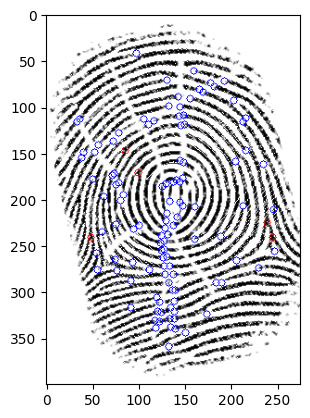

In [107]:
plot_stacked(next(gen))